In [33]:
import numpy as np
import matplotlib.pyplot as plt
import time

def initialzie():
    global call_arrival_rate    # call per minute
    global serviceTime  # in sec
    global queue
    global queueSize
    global runLength
    global server
    global hangUpTime
    global hangUpCount
    global rejectCount
    global servicedCount
    global arrivalCount
    global totalWaitingTime
    global serverNumber
    global waitingTime
    global orderCount

    
    call_arrival_rate = 1*50000
    serviceTime = 10/100    # avg 10 for sending a passanger to dest.
    hangUpTime = 15/100     # avg 15 for a passanger to give up waiting
    waitingTime = 5/100    # avg 5 for a taxi to arrive
    queue = []
    serverNumber = 10   # 10 taxis
    server = [0] * serverNumber
    queueSize = serverNumber
    arrivalCount = 0
    servicedCount = 0
    rejectCount = 0
    runLength = 0
    hangUpCount = 0
    totalWaitingTime = 0
    orderCount = 0
    


In [34]:
class call:
    def __init__(self, arrivalTime, waitingTime, serviceTime, departureTime):
        self.arrivalTime = arrivalTime
        self.waitingTime = waitingTime
        self.serviceTime = serviceTime
        self.departureTime = departureTime

In [35]:
def scheduleNewArrival():
    nextArrivalTime = time.time() + np.random.exponential( 1/call_arrival_rate )
    if (time.time() >= nextArrivalTime):
        newArrival()
        

def newArrival():
    global arrivalCount
    global queueSize
    global rejectCount
    global queue
    global serviceTime
    global waitingTime
    global orderCount

    new = call(time.time(),np.random.exponential(waitingTime), np.random.exponential(serviceTime),0)
    arrivalCount = arrivalCount + 1
    if 0 in server:     # only start the service when there is a free taxi 
        queue.append(new)
        orderCount = orderCount + 1
    else:
        rejectCount = rejectCount + 1

def checkQueue():
    global hangUpTime
    global hangUpCount
    global queue
    for call in queue:
        if (time.time() - call.arrivalTime > np.random.exponential(hangUpTime)):
            queue.remove(call)   # hang up the call and delete from list
            hangUpCount = hangUpCount + 1

def enterServer():
    global queue
    global server
    global totalWaitingTime
    if len(queue) !=0:
        if 0 in server:
            for call in queue:
                if time.time() - call.arrivalTime >= call.waitingTime:
                    call.departureTime = time.time() + call.serviceTime
                    index = findEmpty(server)
                    server[index] = call
                    queue.remove(call)
                    
def departure():
    global server
    global servicedCount
    for i in range(len(server)):
        if server[i] !=0:
            if time.time() > server[i].departureTime:
                server[i] = 0
                servicedCount = servicedCount + 1


def findEmpty(List):
    for i in range(len(List)):
        if List[i]==0:
            break
    return i


def simulate():
    scheduleNewArrival()
    checkQueue()
    enterServer()
    departure()

In [36]:
blockP = []
leaveP = []
for i in [1,3,5,7,9,11]:
    initialzie()
    waitingTime = i/100
    
    while arrivalCount < 5000:
        simulate()
    print("done")

    blockP.append(rejectCount/arrivalCount)
    leaveP.append(hangUpCount/orderCount)
    print(leaveP)


done
[0.8324078748107017]
done
[0.8324078748107017, 0.9415625661655728]
done
[0.8324078748107017, 0.9415625661655728, 0.9648]
done
[0.8324078748107017, 0.9415625661655728, 0.9648, 0.9768]
done
[0.8324078748107017, 0.9415625661655728, 0.9648, 0.9768, 0.9814]
done
[0.8324078748107017, 0.9415625661655728, 0.9648, 0.9768, 0.9814, 0.9832]


Text(0.5, 1.0, 'Blocking Prob vs. Waiting time')

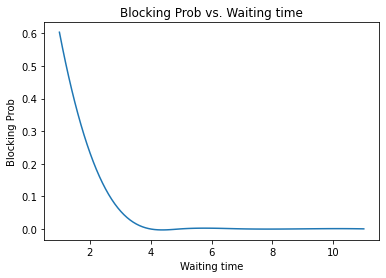

In [38]:
from scipy.interpolate import make_interp_spline
a = [1,3,5,7,9,11]
l = [1*x for x in blockP]
y = np.asarray(l)
x = np.asarray(a)
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 100)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
#plt.ylim([0, 1])
plt.xlabel("Waiting time")
#plt.ylabel("Customer leaving Prob")
plt.ylabel("Blocking Prob")
plt.title("Blocking Prob vs. Waiting time")